# McDonalds Market Segmentation

In [88]:
# Importing the libraries

import numpy as np
import pandas as pd
from collections import Counter

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Clustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from tabulate import tabulate
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [89]:
### Fetching the datsets

dataset = pd.read_csv('mcdonalds.csv')

In [90]:
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [91]:
### Shape of the dataset

dataset.shape

(1453, 15)

In [92]:
### Looking at the datatypes info 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [93]:
# Checking  missing  values 
dataset.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [94]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [95]:
#Checking for the count of below variables
print('Column Gender Value count')
print('\n')
print(dataset['Gender'].value_counts())
print('\n')
print('Column  Frequency Value count')
print('\n')
print(dataset['VisitFrequency'].value_counts())
print('\n')
print('Column Like Value count')
print('\n')
print(dataset['Like'].value_counts())

Column Gender Value count


Female    788
Male      665
Name: Gender, dtype: int64


Column  Frequency Value count


Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64


Column Like Value count


+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


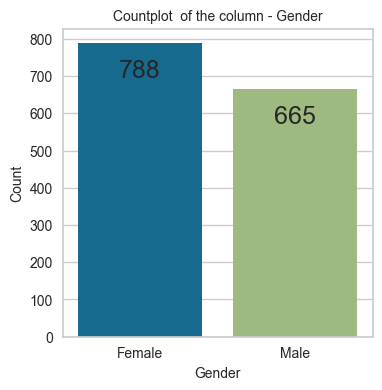

In [96]:
# Countplot  of the column - Gender
plt.figure(figsize=(4,4))
pd =sns.countplot(x = "Gender" ,  data=dataset)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Gender", size=10)
plt.ylabel("Count" ,size=10)
plt.title (" Countplot  of the column - Gender " , size=10)
plt.show()
# From here we get  that females are more than  males in  dataset

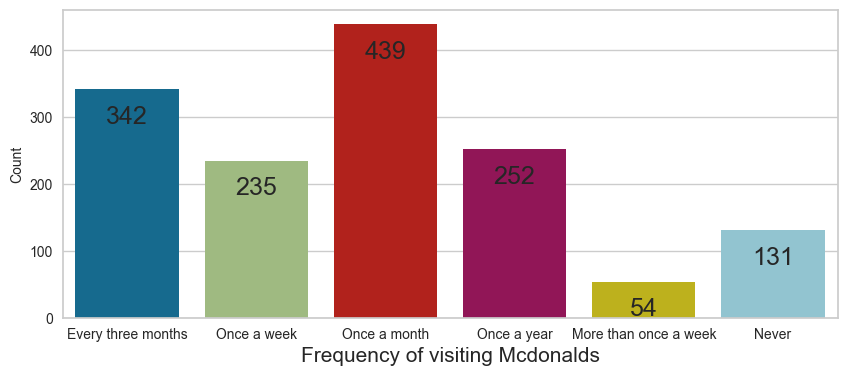

In [97]:
# Countplot  of Frequency Value count
plt.figure(figsize=(10,4))
pd =sns.countplot(x = "VisitFrequency" ,  data=dataset)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Frequency of visiting Mcdonalds", size=15)
plt.ylabel("Count" ,size=10)
plt.show()
# plot shows people who are visiting MCdonalds only once in  a month has highest count

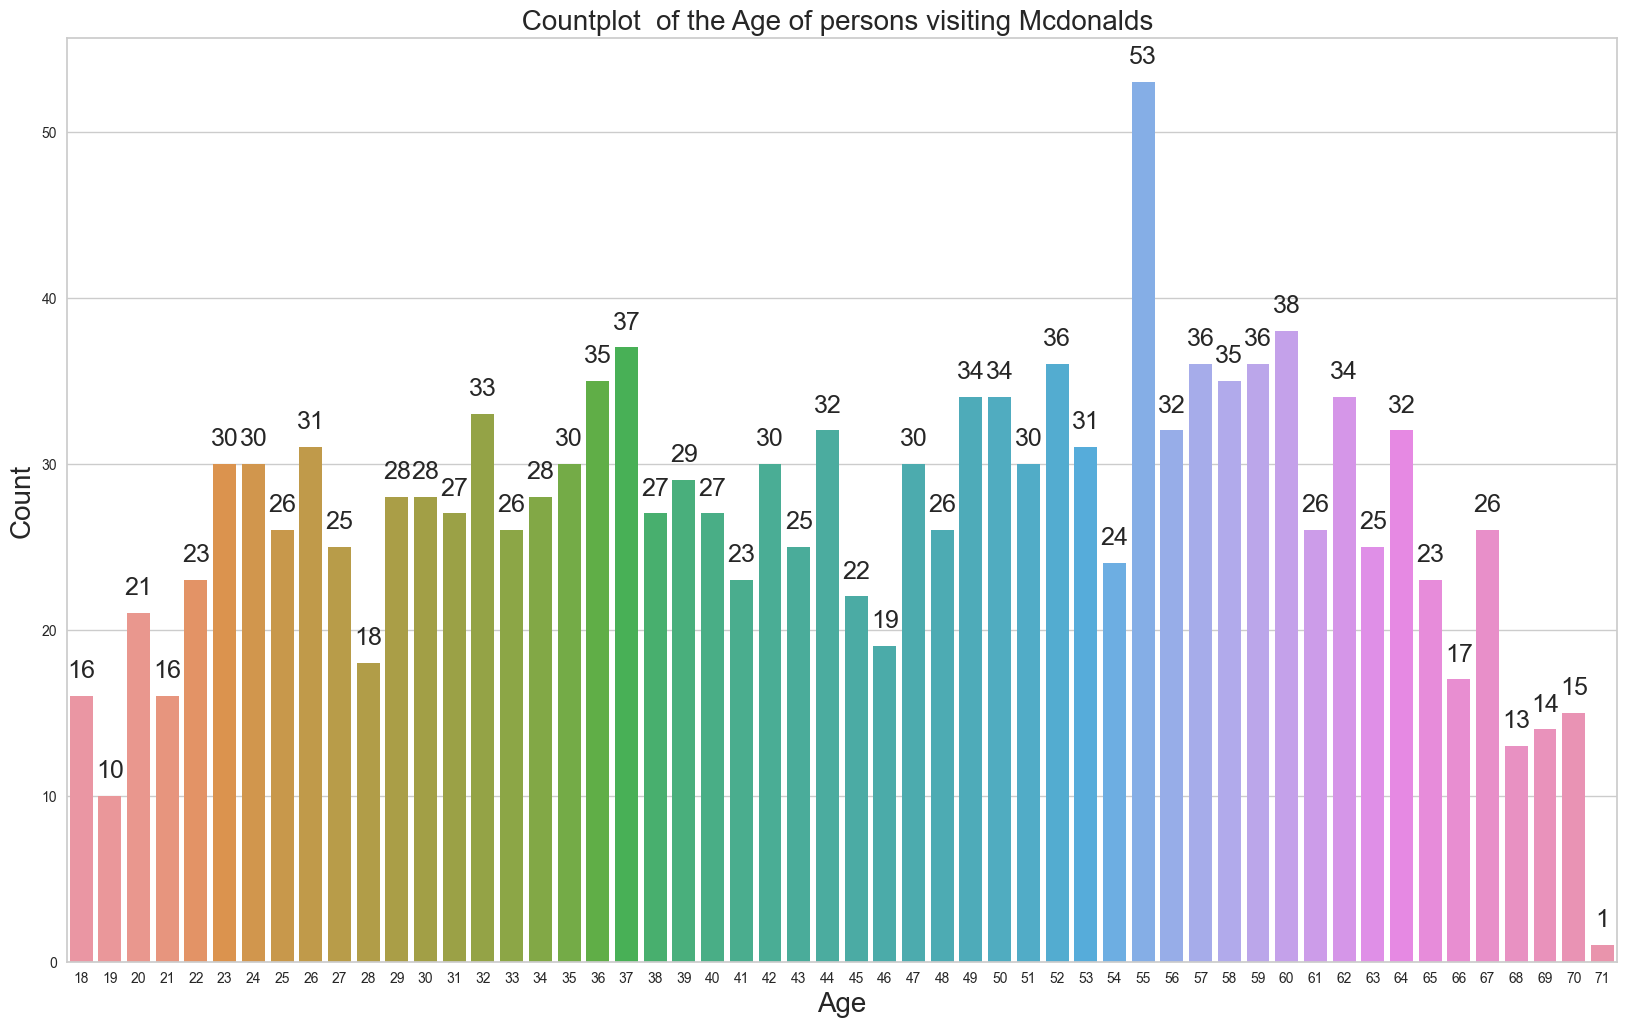

In [98]:
# Countplot  of the column - Age
plt.figure(figsize=(20,12))
pd =sns.countplot(x = "Age" ,  data=dataset)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 18), 
                   textcoords = 'offset points')
plt.xlabel("Age", size=20)
plt.ylabel("Count" ,size=20)
plt.title (" Countplot  of the Age of persons visiting Mcdonalds  " , size=20)
plt.show()
# From here we get  information that people whose age is 55 has the highest count 

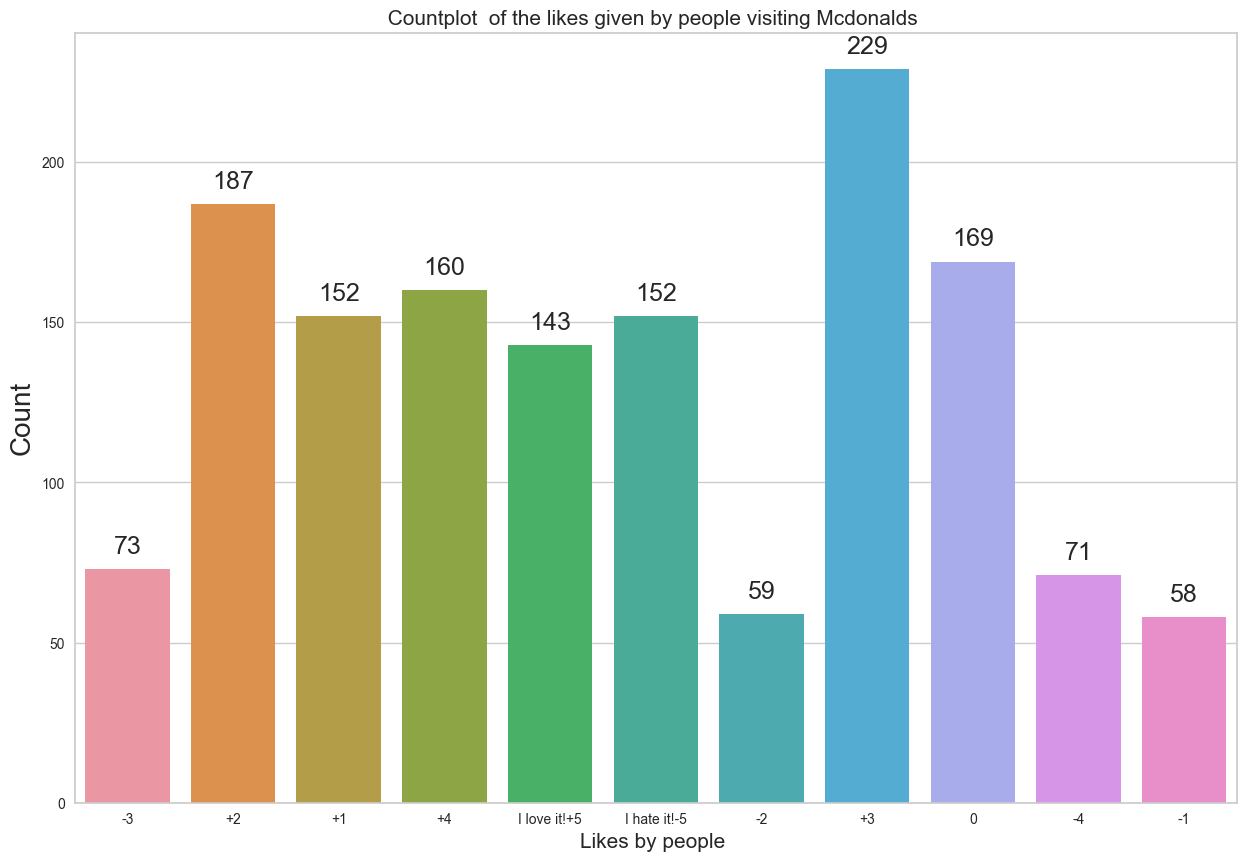

In [99]:
# Countplot  of the column - like
plt.figure(figsize=(15,10))
pd =sns.countplot(x = "Like" ,  data=dataset)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 16), 
                   textcoords = 'offset points')
plt.xlabel("Likes by people ", size=15)
plt.ylabel("Count" ,size=20)
plt.title (" Countplot  of the likes given by people visiting Mcdonalds  " , size=15)
plt.show()
# From here we get  information that people who have given +3 like have the highest count 

In [100]:
# Printing like column all  values count
print(dataset['Like'].value_counts())

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


In [102]:
# Making new column in which those rating which are greater than 0 are positive rating and those rating <=0
# are negative ratings
conditions = [
    (dataset['Like'] ==  '+3'),
    (dataset['Like'] ==  '+2'),
 
    (dataset['Like'] ==  '+1'), 
    (dataset['Like'] ==  '+4'),
    (dataset['Like'] ==  'I love it!+5'),
    (dataset['Like'] ==  '0'),   
    (dataset['Like'] ==  'I hate it!-5'),
    (dataset['Like'] ==  '-3'),
    (dataset['Like'] ==  '-4'),
    (dataset['Like'] ==  '-2'),
    (dataset['Like'] ==  '-1'),
    ]

# create a list of the values we want to assign for each condition
values = ['Positive Rating','Positive Rating','Positive Rating','Positive Rating','Positive Rating',
         'Zero Rating','Negative Rating','Negative Rating','Negative Rating','Negative Rating','Negative Rating',]

# create a new column and use np.select to assign values to it using our lists as arguments
dataset['Rating'] = np.select(conditions, values)

In [103]:
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Rating
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,Negative Rating
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,Positive Rating
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,Positive Rating
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,Positive Rating
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,Positive Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male,Negative Rating
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,Positive Rating
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,Positive Rating
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,Positive Rating


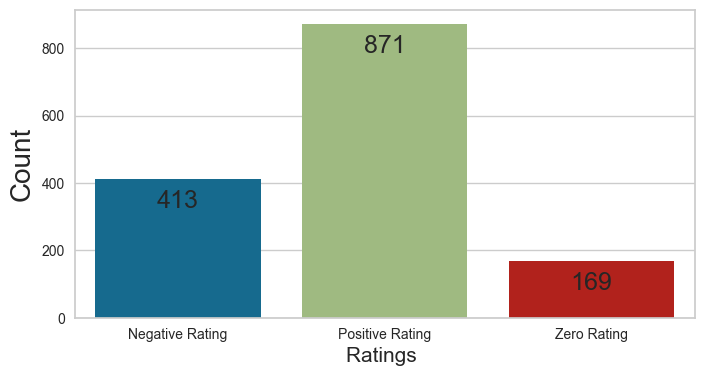

In [104]:
# Countplot  of the Ratings
plt.figure(figsize=(8,4))
pd =sns.countplot(x = "Rating" ,  data=dataset)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -16), 
                   textcoords = 'offset points')
plt.xlabel("Ratings ", size=15)
plt.ylabel("Count" ,size=20)
#plt.title (" Countplot  of the likes given by people visiting Mcdonalds  " , size=15)
plt.show()
# From here we get  information that positive ratings is 59 % from all the ratings 

In [105]:
dataset['Rating'].value_counts()

Positive Rating    871
Negative Rating    413
Zero Rating        169
Name: Rating, dtype: int64

In [106]:
print('Positive Rating percentage :-  ', round((len(dataset[dataset['Rating']=='Positive Rating'])/len(dataset['Rating']))*100,2),'%')
print('Negative Rating percentage :-  ', round((len(dataset[dataset['Rating']=='Negative Rating'])/len(dataset['Rating']))*100,2),'%')
print('Zero Rating percentage :-  ', round((len(dataset[dataset['Rating']=='Zero Rating'])/len(dataset['Rating']))*100,2),'%')
# From this we get information that out of total data 60 % data have positive rating

Positive Rating percentage :-   59.94 %
Negative Rating percentage :-   28.42 %
Zero Rating percentage :-   11.63 %


In [107]:
dataset.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Rating'],
      dtype='object')

In [108]:
dat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

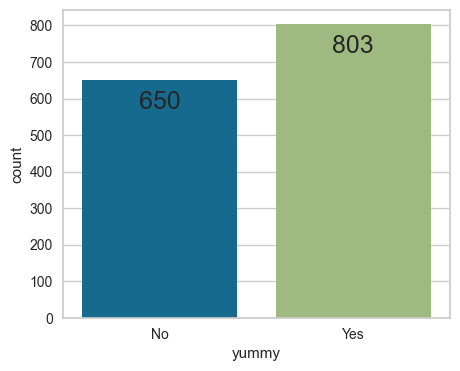

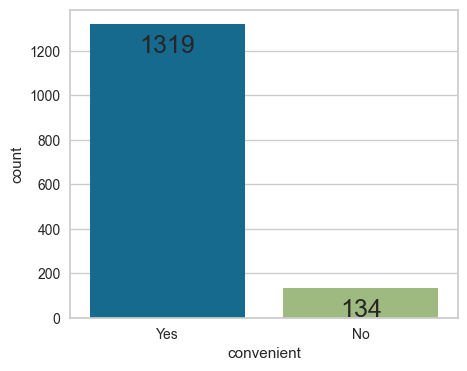

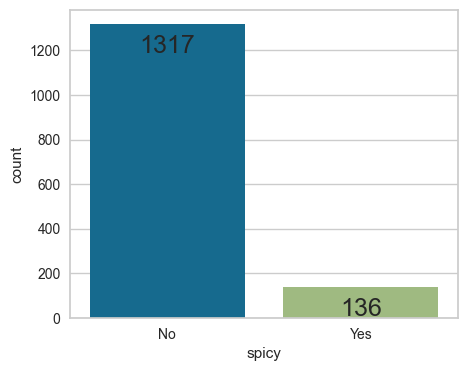

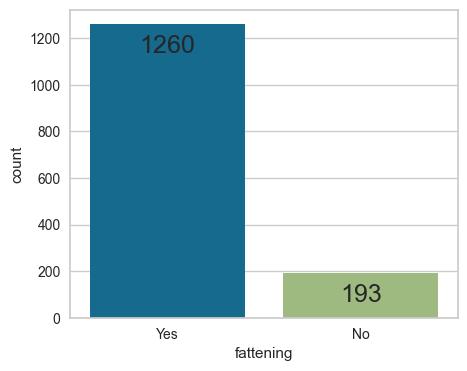

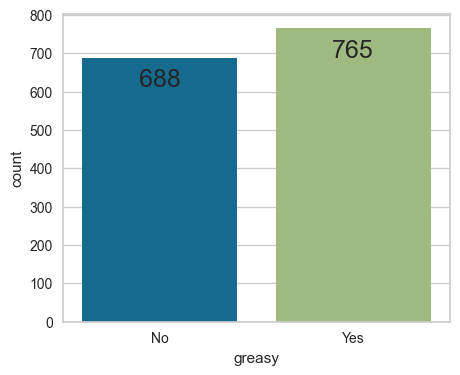

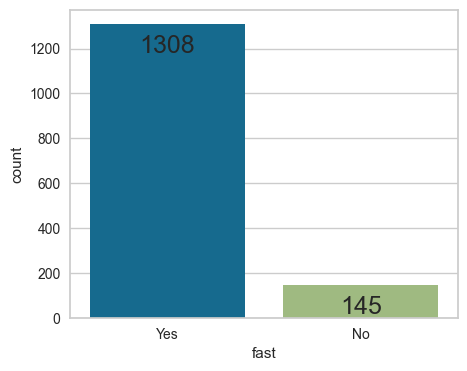

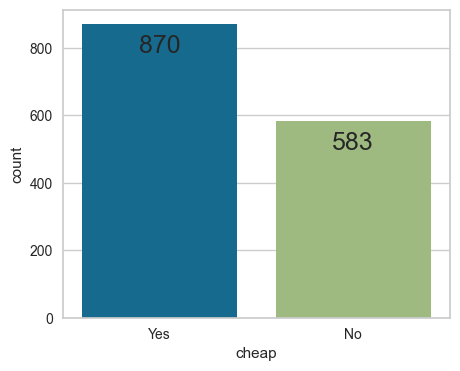

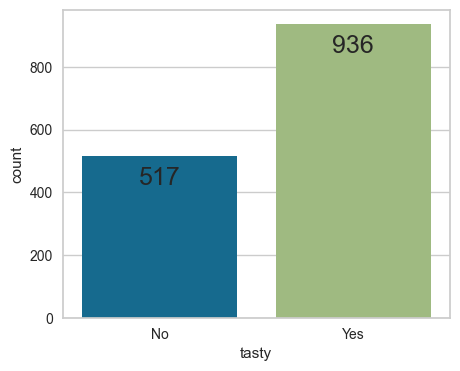

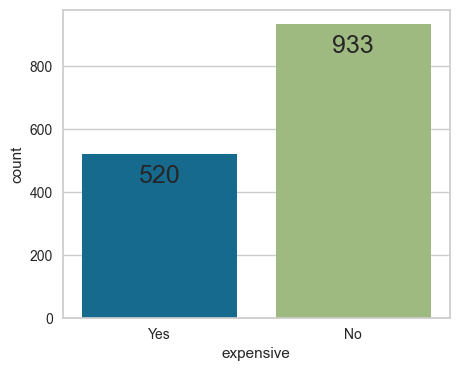

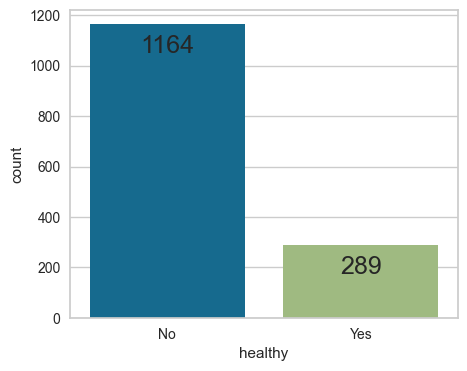

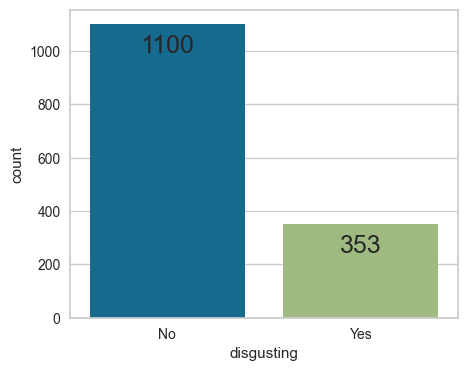

In [109]:
# Analysis of columns data 
for i in dat:
    plt.figure(figsize=(5,4))
    pd =sns.countplot(x = i ,  data=dataset )
    for p in pd.patches:
        pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -16), 
                   textcoords = 'offset points')

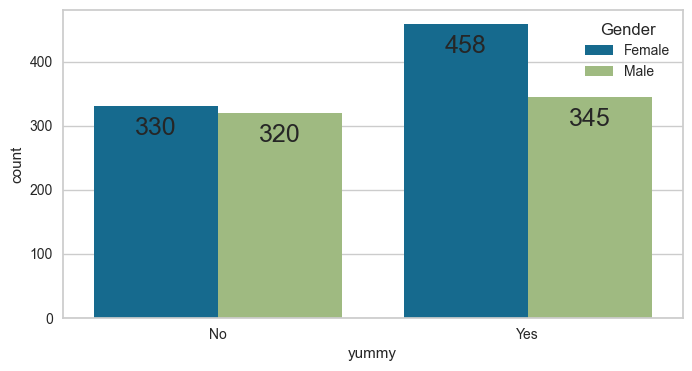

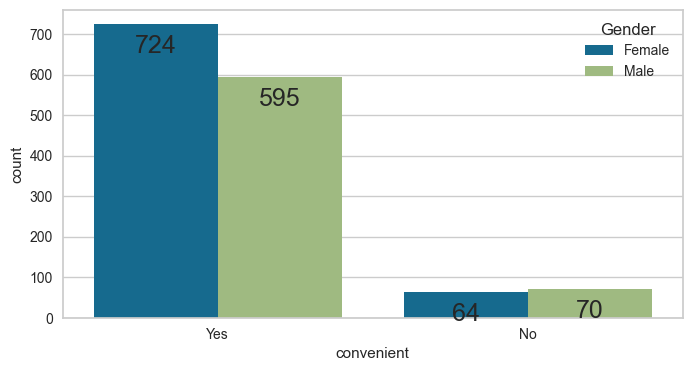

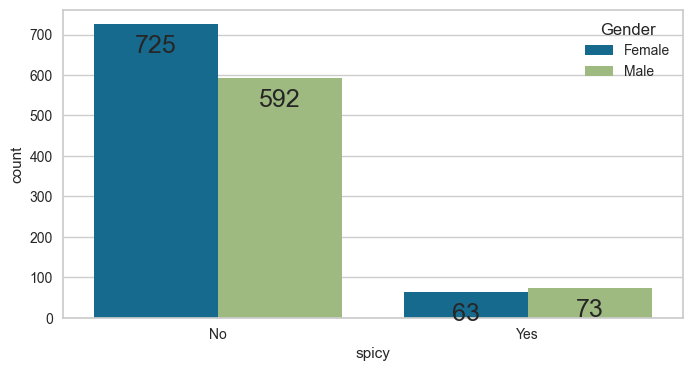

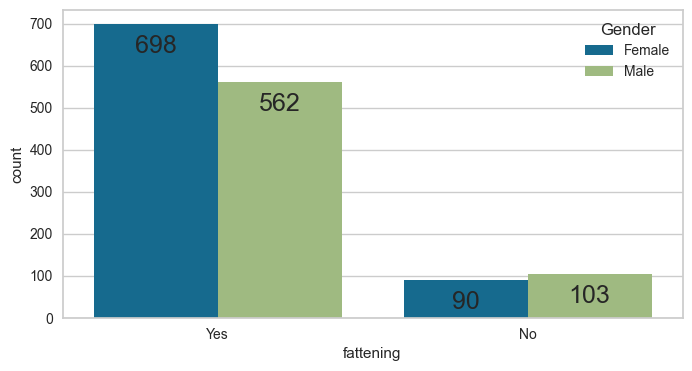

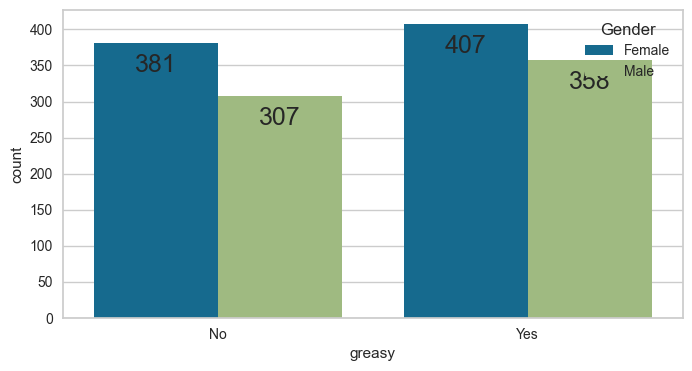

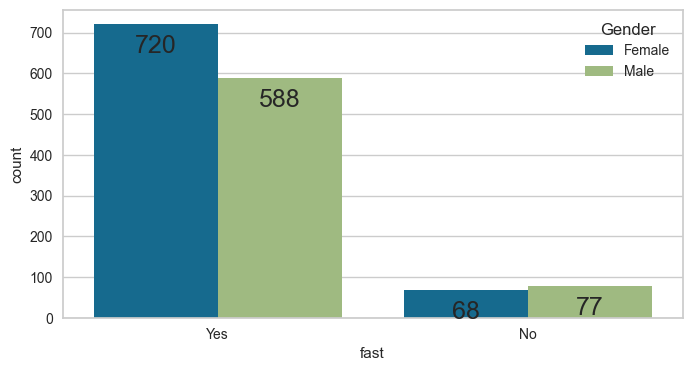

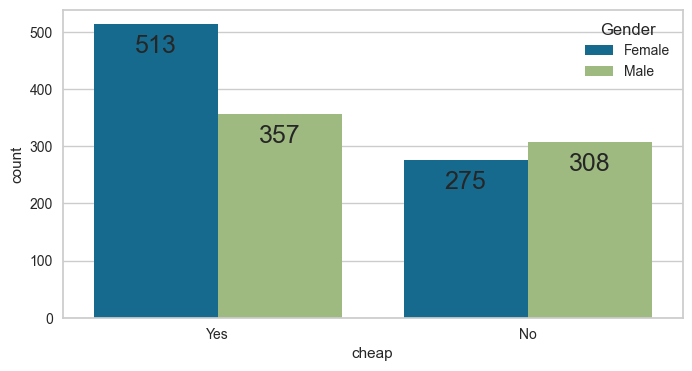

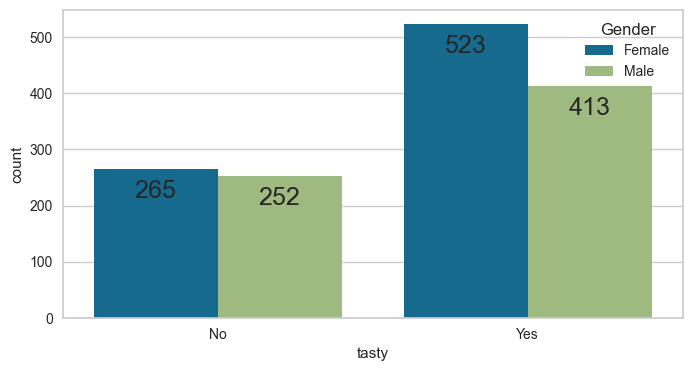

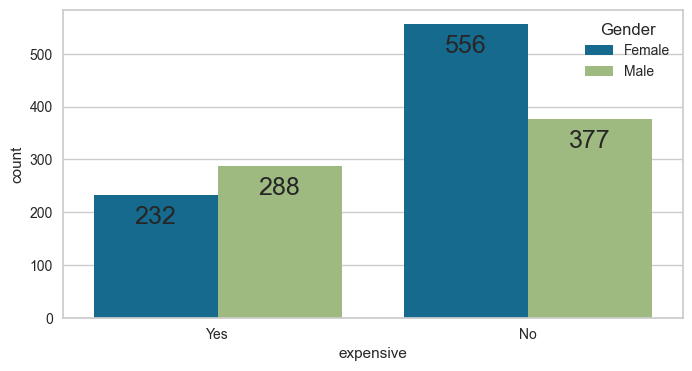

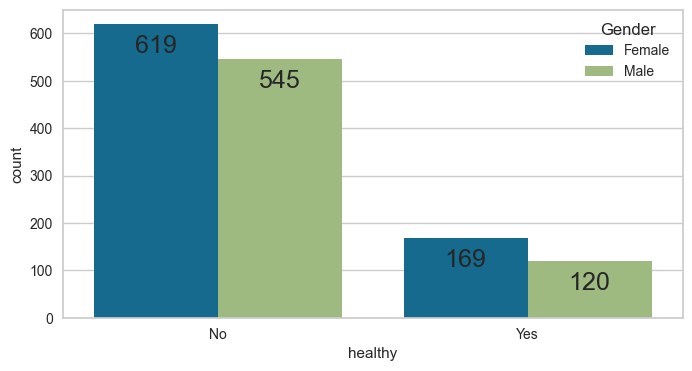

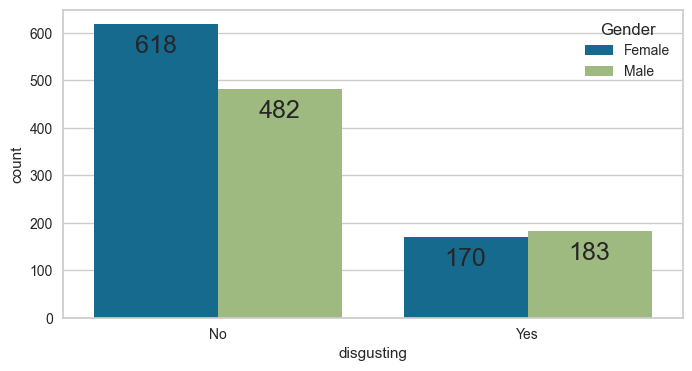

In [110]:
# Analysis of columns data with gender
for i in dat:
    plt.figure(figsize=(8,4))
    pd =sns.countplot(x = i ,  data=dataset , hue='Gender')
    for p in pd.patches:
        pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -16), 
                   textcoords = 'offset points')

In [112]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    dataset[x] = LabelEncoder().fit_transform(dataset[x])
    return dataset

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Rating
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,Negative Rating
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,Positive Rating
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,Positive Rating
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,Positive Rating
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,Positive Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,Negative Rating
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,Positive Rating
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,Positive Rating
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,Positive Rating


In [113]:
t = dataset.iloc[:,0:11]

In [123]:
# selecting the columns using which we create our clustering model
x = dataset.iloc[:,0:11]

In [124]:
x= x.values

In [125]:
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [126]:
# Using Principal component analysis 
from sklearn.decomposition import PCA
pca = PCA(.98)
pc = pca.fit_transform(x)


In [127]:
pc.shape

(1453, 11)

In [128]:
pca.explained_variance_ratio_
# conclusion from  here we get information that pc1 and pc2 account for 50 %  of total data variance

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [129]:
pc

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [134]:
import pandas as lo

In [135]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = lo.DataFrame(data =pc , columns= names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [136]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = lo.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = t.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


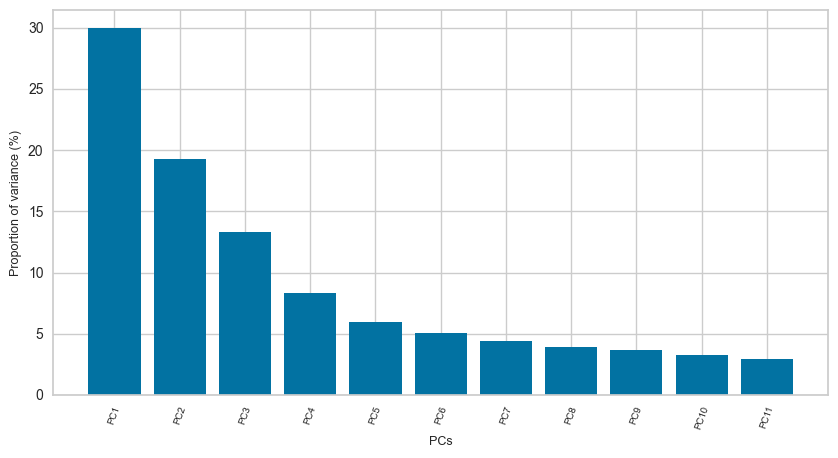

In [137]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

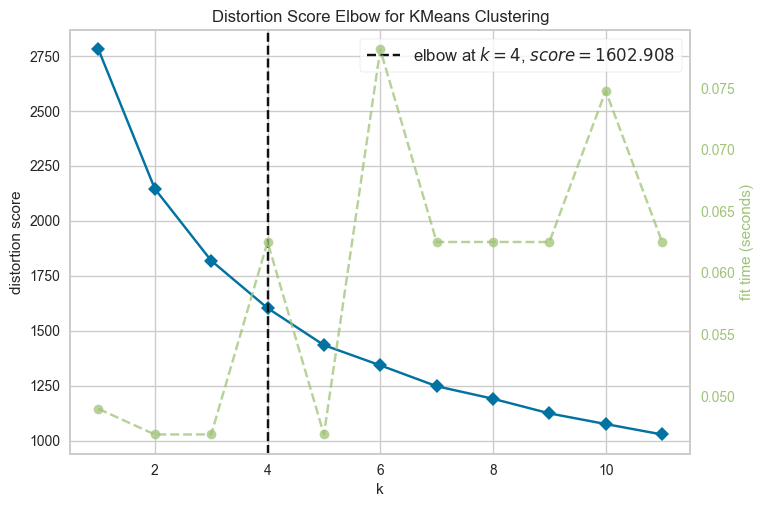

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(t)
visualizer.show()

In [145]:
#K-means clustering 
# creating cluster groups 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
dataset['cluster_num'] = kmeans.labels_ #adding to dataset
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 0 0 ... 0 1 3]
1603.0604440558925
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [156]:
dataset1 = dataset.drop(['Rating'], axis =1)
dataset1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,5,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,4,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,3,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,0,Male,1


In [146]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

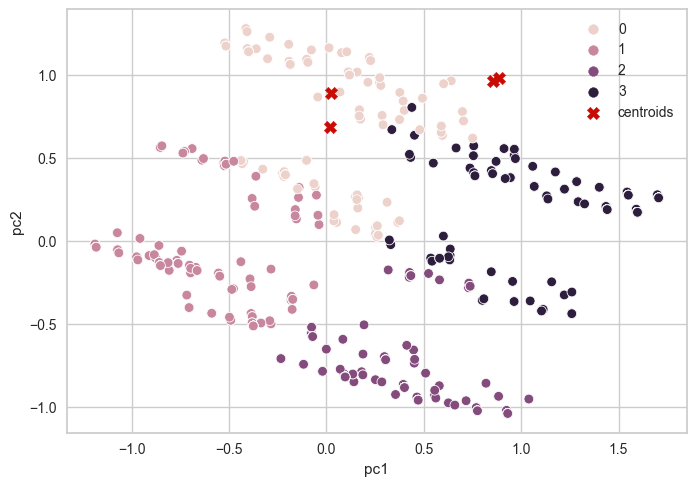

In [147]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

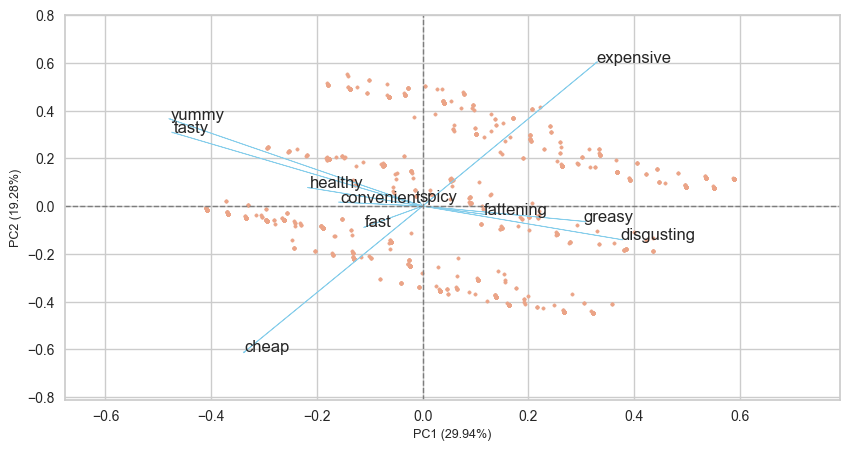

In [148]:
from bioinfokit.visuz import cluster
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=dataset.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [151]:
#Calculating the mean Visit frequency
dataset['VisitFrequency'] = LabelEncoder().fit_transform(dataset['VisitFrequency'])
visit = dataset.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


# Conclusion 

From  above analysis we able to form 4 clusters in which cluster 1 contain the people who are happy with the MCdonalds they 
consider it  as cheap and yummy , tasty and  convenient  . cluster 0 contain people who consider mcdonalds food as yummy , tasty,convenient but they consider it as expensive. cluster 2 contain people who consider mcdonalds product as cheap but they not satisfied with its quality of food they consider it as greasy , disgusting and spicy. cluster 3 contain people who consider mcdonalds food as expensive along with that they  also not like the quality of the food and consider it as greasy , disgusting and spicy.

So inorder to improve its customer rating and also sales  mcdonalds team have to mainly focus on cluster 2 and cluster 0 , why ?? here are the points

cluster 1 - contains the people who are already satisfied with services and food of mcdonalds so no need to focus on them just
we have to make sure they remain satisfied and they don't move to other clusters, now cluster 0 contain the people who like the mcdonalds food but they find it expensive so mcdonald team should give them some promotional offers or discount so that their rating  and sales increases from the people belong to this  cluster  .Now the people in cluster 2 are the people who find food cheap but not like the food quality , so mcdonald team should get feedback of these people what specific thing they not like about the food and they should try to improve the quality of food if it is genuine issue . Now reamining the people in cluster 3 which dont find food quality up  to the mark  and also find it as expensive , the mcdonald team should should not focus on these cluster people  ,  why ??? . We always find specific category of customers who always has a habit of  finding fault in food and services , these category of people belong to cluster 3 because if you see the above visit frequency table cluster 3 people has second heighest vist frequency . So actually these people complain about food still they come again again so  no need to waste  resources on these category of people. So hope these analysis will help the Mcdonald  team in creating their  plans .